# Forecasting the Price & Trend of CAD-USD Exchange based on historical Data

## Business Use Case

A canadian company that imports plastics from US wants to develop a model that can be used forecast the price and/or the future trend of the CAD-USD exchange rate.

## Hypothesis & Objectives

The hypothesis is that the future price or trend can be predicted with historical prices.

So the objective of this project is to:
- collect historical data on CAD-USD prices
- Clean & analyse the data
- Implement different ML models to forecast the future price/trend
- Make recommendation to the company - has the hypothesis been proven?
- Deploy the model

### Importing Libraries 

In [140]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates 

### Data 

I obtained historical data on daily CAD/USD conversion rates from November 21, 2017 - November 21, 2022 from Yahoo finance 
 
Link - https://ca.finance.yahoo.com/quote/CADUSD%3DX/history?period1=1511308800&period2=1669075200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

## Part 1 - Data Analysis

### Load Data

In [141]:
data = pd.read_csv(r'C:\Users\olalawal\Downloads\CADUSD.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-22,0.782963,0.786411,0.782791,0.782840,0.782840,0.0
1,2017-11-23,0.786999,0.789204,0.785960,0.787092,0.787092,0.0
2,2017-11-24,0.786596,0.787836,0.784560,0.786621,0.786621,0.0
3,2017-11-27,0.786559,0.788706,0.784252,0.786535,0.786535,0.0
4,2017-11-28,0.783816,0.784191,0.779818,0.783797,0.783797,0.0


#### Set the datetime index

In [142]:
data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', drop=True, inplace=True)

#### Set the frequency of the datetime Index

In [143]:
# We will use a business day frequency since we only have prices from Monday to Friday
data.index=data.index.to_period('B')
data.index

PeriodIndex(['2017-11-22', '2017-11-23', '2017-11-24', '2017-11-27',
             '2017-11-28', '2017-11-29', '2017-11-30', '2017-12-01',
             '2017-12-04', '2017-12-05',
             ...
             '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-14',
             '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18',
             '2022-11-21', '2022-11-22'],
            dtype='period[B]', name='Date', length=1305)

### Data Exploration/Cleaning

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1305 entries, 2017-11-22 to 2022-11-22
Freq: B
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1304 non-null   float64
 1   High       1304 non-null   float64
 2   Low        1304 non-null   float64
 3   Close      1304 non-null   float64
 4   Adj Close  1304 non-null   float64
 5   Volume     1304 non-null   float64
dtypes: float64(6)
memory usage: 71.4 KB


In [145]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.0
mean,0.768829,0.770999,0.766545,0.768847,0.768847,0.0
std,0.024669,0.024610,0.024755,0.024658,0.024658,0.0
min,0.690026,0.693371,0.681826,0.689741,0.689741,0.0
25%,0.752964,0.754555,0.751095,0.753000,0.753000,0.0
50%,0.766983,0.769112,0.764804,0.767054,0.767054,0.0
75%,0.787175,0.789656,0.784332,0.787155,0.787155,0.0
max,0.830599,0.832778,0.829009,0.830703,0.830703,0.0


#### Remove Columns that are not useful

In [146]:
data['Volume'].value_counts()

0.0    1304
Name: Volume, dtype: int64

Looks like the "Volume" column only contains 0, so I will remove it

In [147]:
#from the output of the data.describe(), it seems like two columns; Close & Adj Close have the same values. 
#I will confirm below

(data['Close'] == data['Adj Close']).value_counts()

True     1304
False       1
dtype: int64

In [148]:
#reconfirm below
(data['Close'] - data['Adj Close']).value_counts()

0.0    1304
dtype: int64

I've confirmed that both columns have the same value, so I will remove the 'Adj Close' column.

In [149]:
data.drop(labels=['Adj Close', 'Volume'], axis = 1, inplace=True)

In [150]:
data.head()

,Open,High,Low,Close
Date,,,,
2017-11-22,0.782963,0.786411,0.782791,0.782840
2017-11-23,0.786999,0.789204,0.785960,0.787092
2017-11-24,0.786596,0.787836,0.784560,0.786621
2017-11-27,0.786559,0.788706,0.784252,0.786535
2017-11-28,0.783816,0.784191,0.779818,0.783797


#### Check for missing values

In [151]:
#check for null values 
data.isnull().sum()

Open     1
High     1
Low      1
Close    1
dtype: int64

Looks like there is a null value in each column.
Let's see if its a single row

In [152]:
dat= data.isna()
dat[dat['Open']==True]

,Open,High,Low,Close
Date,,,,
2019-05-22,True,True,True,True


So I've confirmed that its a single row, now lets remove it

In [153]:
data.dropna(axis =0, how = 'all', inplace=True)

In [154]:
data.shape

(1304, 4)

In [155]:
data.to_csv(r'C:\Users\olalawal\cad_usd.csv')

### Data Visualization

Lets see how the price has changed overtime

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

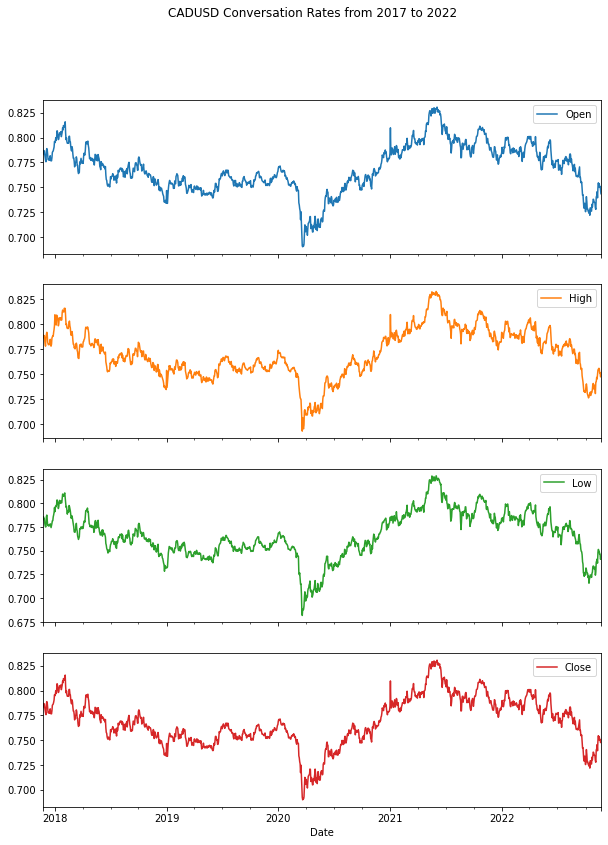

In [156]:
data.plot(y=['Open','High','Low','Close'], kind ='line', title = 'CADUSD Conversation Rates from 2017 to 2022', legend = True, subplots=True, figsize=(10,13))

We can see that the price has flunctuated over the years but it seemed to reach an all time low in 2020. 

Lets view the average prices for each month.

#### Boxplots
Lets create boxplots for each year to see how the values are spread out

[Text(0.5, 1.0, 'Closing Price Boxplot grouped by Year')]

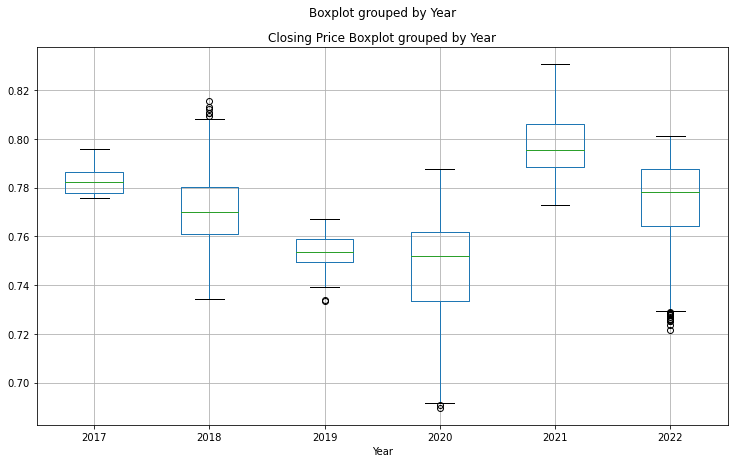

In [157]:
data['Year']=data.index.year
ax = data.boxplot(column ='Close', by = 'Year', figsize = (12,7))
ax.set(title='Closing Price Boxplot grouped by Year')

From the boxplot, We can clearly see that there are a number of outliers in 2018, 2019,2020,2022 but we will leave them for now.
We can also see that the lowest conversion rate was in 2020,  A more 

### Check for Stationarity, Trends, Seasonality

#### Check for Stationarity

From plotting the data, it doesnt look stationary, but I'll confirm with the Augmented Dickey-Fuller Test

In [158]:
from statsmodels.tsa.stattools import adfuller

In [159]:
adfuller(data['Close'])

(-2.2993105569325816,
 0.17219042704275334,
 2,
 1301,
 {'1%': -3.4353863176881863,
  '5%': -2.863764118428576,
  '10%': -2.5679541345952175},
 -10848.255625611357)

In [160]:
dftest = adfuller(data['Close'])
dfout = pd.Series(dftest[0:4], index = ['ADF Test Statistic', 'P-value', '# Lags used', 'NO of Observations'])

In [161]:
for key,val in dftest[4].items():
    dfout[f'critical value({key})'] = val

In [162]:
dfout

ADF Test Statistic       -2.299311
P-value                   0.172190
# Lags used               2.000000
NO of Observations     1301.000000
critical value(1%)       -3.435386
critical value(5%)       -2.863764
critical value(10%)      -2.567954
dtype: float64

#### I'll use a function that will explain the result of the stationarity test

In [163]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [164]:
adf_test(data['Close'], 'CAD-USD Prices - 2017-2022')

Augmented Dickey-Fuller Test: CAD-USD Prices - 2017-2022
ADF test statistic        -2.299311
p-value                    0.172190
# lags used                2.000000
# observations          1301.000000
critical value (1%)       -3.435386
critical value (5%)       -2.863764
critical value (10%)      -2.567954
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Now that I know the data is not stationary, I'll extract the trend & seasonality 

#### ETS DECOMPOSITION

ETS Decompsoition - Error, Trend, seasonality

In [165]:
data.index=data.index.to_timestamp()  #because seasonal decompose does not accept period index
data.index

DatetimeIndex(['2017-11-22', '2017-11-23', '2017-11-24', '2017-11-27',
               '2017-11-28', '2017-11-29', '2017-11-30', '2017-12-01',
               '2017-12-04', '2017-12-05',
               ...
               '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-14',
               '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18',
               '2022-11-21', '2022-11-22'],
              dtype='datetime64[ns]', name='Date', length=1304, freq=None)

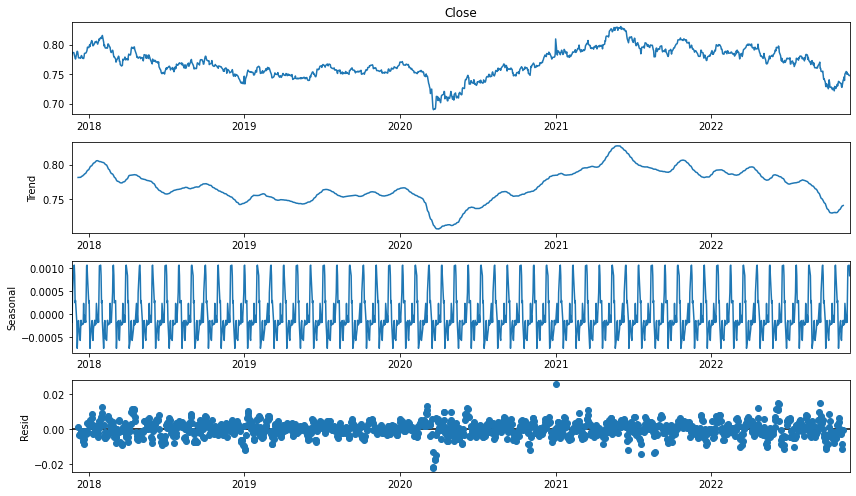

In [166]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Close'], model= 'additive', period =22)

from pylab import rcParams
rcParams['figure.figsize'] = 12,7
result.plot();

There are clearly different trends in the dataset (for a while, it was decreasing, but towards the end of 2021, there is an increasing trend)..

After carefully analysing the seasonality plot from the ETS decomposition, I'll say the data has some monthly seasonality. But looking at the magnitude of the seasonal component, its very small compared to the values. (I can ignore this and say the data is not seasonal)

Another method for extracting trend for time seried data is the hpfilter

Let's try to extract the trends for the "Close" prices 
Since I'm dealing with daily data, my smoothing factor will be (365**4)*6.25 = 110,930,628,906.25
The smoothing factor is too large so I will try 110930629

In [167]:
from statsmodels.tsa.filters.hp_filter import hpfilter
cycle, trend = hpfilter(data['Close'], lamb=110930629)

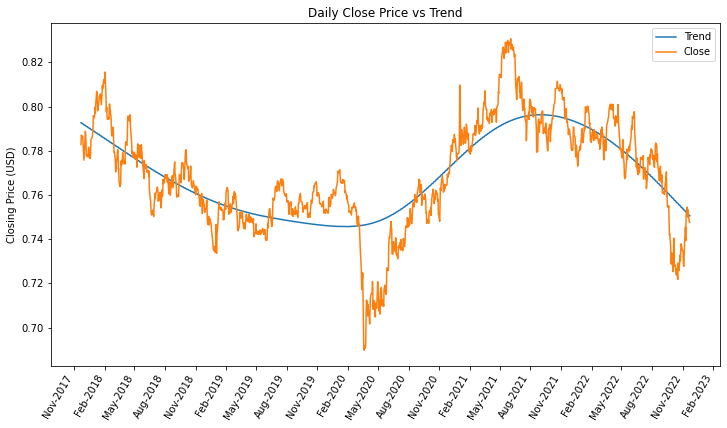

In [168]:
data['Trend'] = trend


ax = data[['Trend','Close']].plot(figsize =(12,7), title = 'Daily Close Price vs Trend', ylabel = 'Closing Price (USD)', xlabel ='Closing Date',rot=60)
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.MonthLocator(interval =3))
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))

The plot confirms my earlier observation about the trends. 
- Downward from Nov 2017 to Aug 2019
- Upwards from May 2020 to June 2021 
- Downwards from there. 

Come back to the trend. is it linear or exponential? is it generally increasing?

### Moving Average

Let's plot a simple moving average of 30 (30 days) & 60  to smoothen the data a bit 

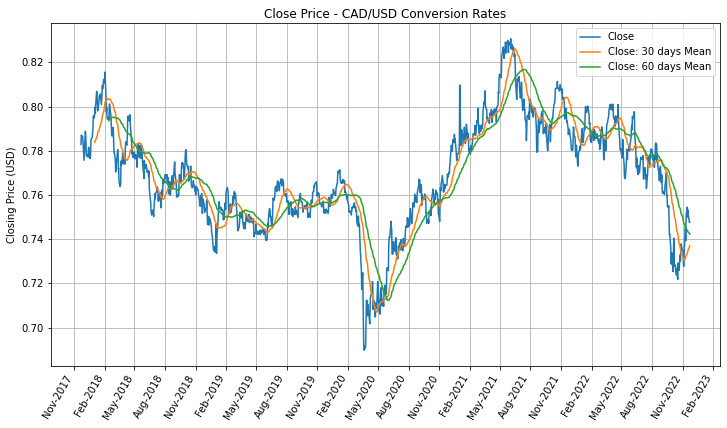

In [169]:
data['Close: 30 days Mean'] = data['Close'].rolling(window=30).mean()
data['Close: 60 days Mean'] = data['Close'].rolling(window=60).mean()

ax = data[['Close', 'Close: 30 days Mean','Close: 60 days Mean']].plot(title = 'Close Price - CAD/USD Conversion Rates', figsize=(12,7), ylabel = 'Closing Price (USD)', xlabel ='Closing Date',rot=60);
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.MonthLocator(interval =3))
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
#ax.xaxis.set_minor_locator(dates.YearLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n\n%Y'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

We can see that the the higher the rolling window, the smoother the data and we can see the trends in the data very clearly. 
Its also clear that the lowest price was recorded in March 2020 (probably during the peak of covid 19) and the highest price was recorded in June 2021.
The plot above also shows the different trends in the price over the years.
There is a downward trend from Nov 2017 to August 2019. 
The trend then changes to an horizontal/stationary one between August 2019 and March 2020.
After March 2020, we say a dip after which there is an upward trend till it peaks at June 2021.

As shown in the above plot, the SMA is able to smoothen the data but we can observe that:
- It lags by the size of the window. So for the SMA with window of 30, we do not see any values until the 30th day.
- The SMA plot never reaches the peak. This is due to averaging
- There is also the possibility of any extreme values skewing the SMA 

An Exponential Weighted Moving average can be used to solve some of these issues.


#### Exponential Moving Average

Let's plot an Exponential Weighted Moving average with 30 days & 60 days  

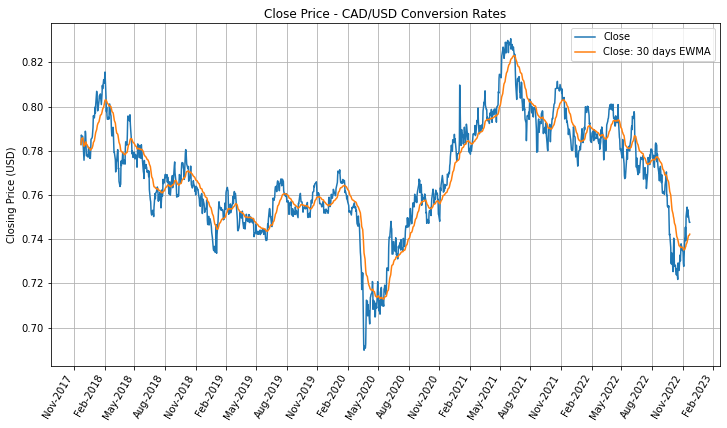

In [170]:
data['Close: 30 days EWMA'] = data['Close'].ewm(span = 30).mean()

ax = data[['Close', 'Close: 30 days EWMA']].plot(title = 'Close Price - CAD/USD Conversion Rates', figsize=(12,7), ylabel = 'Closing Price (USD)', xlabel ='Closing Date',rot=60);
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.MonthLocator(interval =3))
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
#ax.xaxis.set_minor_locator(dates.YearLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n\n%Y'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

Comparing the EWMA plot to that of the SMA, We can see that the issue with the lag has been fixed.  
EWMA can be used to forecast future values however the EWMA above is a simple one with just one smoothing factor (alpha). This method will not be effective for forecasting as it will not take into account any trends or seasonality that might be present in the data.

#### Holt-Winters Methods - Double & Triple Exponential Smoothing 

In [171]:
#Double Exponential Smoothing addresses the level & trend in the data
#Triple Exponential Smoothing addresses the level, trend & seasonality in the data



In [172]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Using trend = 'add' because the trend is linear
#using shift = -1 to shift the data because the des sort of repeats the first 2 
data['DES'] = ExponentialSmoothing(data['Close'], trend='mul').fit().fittedvalues.shift(-1)
data[['Close', 'DES']].head()

C:\Users\olalawal\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Close,DES
Date,,
2017-11-22,0.782840,0.782896
2017-11-23,0.787092,0.786982
2017-11-24,0.786621,0.786641
2017-11-27,0.786535,0.786548
2017-11-28,0.783797,0.783884


<AxesSubplot:xlabel='Date'>

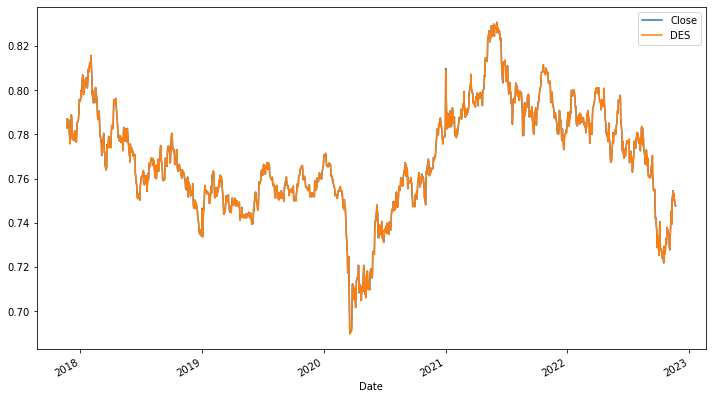

In [173]:
data[['Close', 'DES']].plot()

The Double Exponential SMoothing falls really close to the real data.

C:\Users\olalawal\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date'>

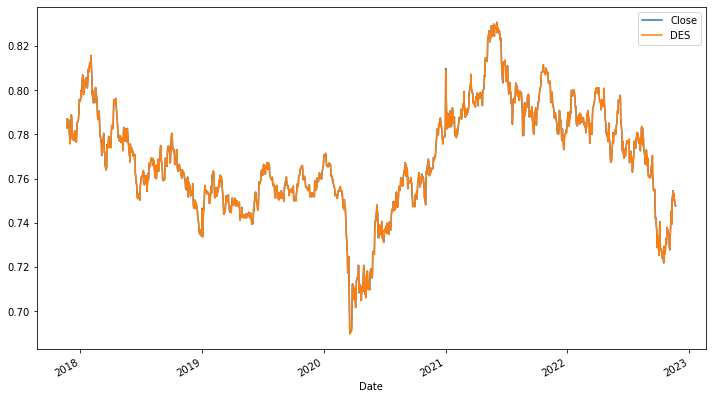

In [174]:
data['TES'] = ExponentialSmoothing(data['Close'], trend='mul', seasonal ='mul', seasonal_periods = 30).fit().fittedvalues.shift
data[['Close', 'DES','TES']].plot()

### More Data Exploration

### Autocorrelation & Partial Auto Correlation plots

The ACF & PACF plots can be used to select the best values to use for P,Q in ARIMA based models

In [175]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

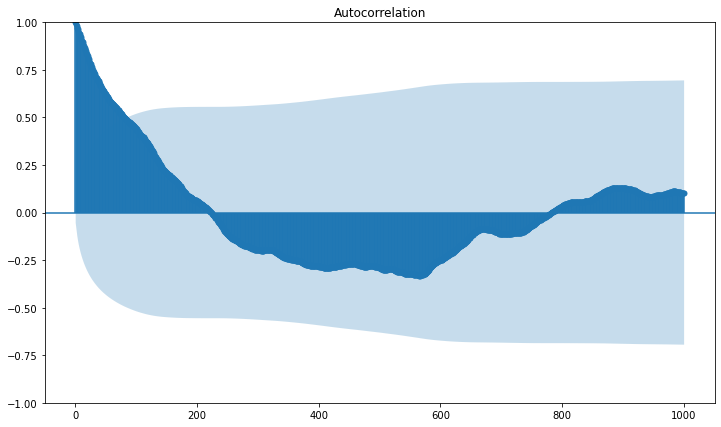

In [176]:
plot_acf(data['Close'],lags=1000);

I have first plotted the ACF with 1000 lags because I am trying to see if there is some sort of seasonality.
Since my data is business days (one year will be 260 days). 
I dont see any clear pattern in this 

Lets repeat with lower lags to see if we would observe a weekly or monthly pattern or seasonality

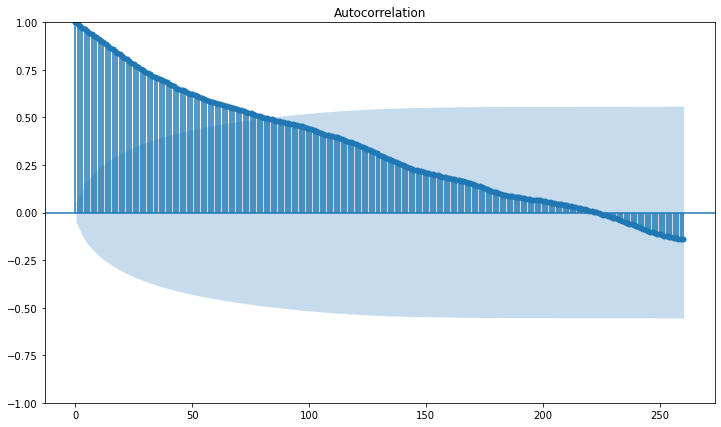

In [177]:
plot_acf(data['Close'],lags=260);

I still dont observe any seasonality here. 
This might be because there are so many outside factors that affect the conversion rate (o.e its just not a function of time)

C:\Users\olalawal\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


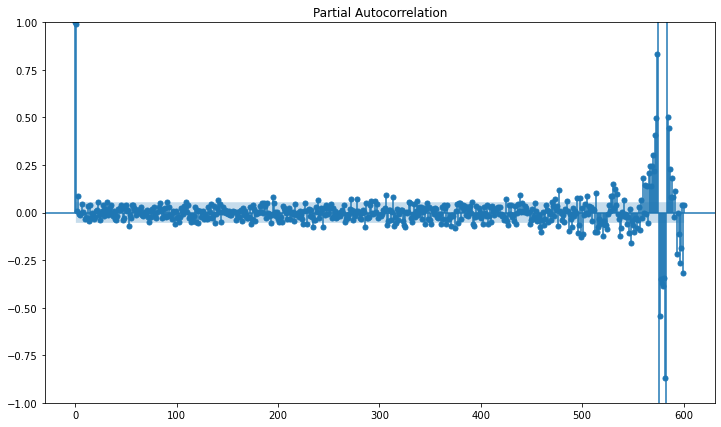

In [178]:
plot_pacf(data['Close'],lags=600);

#### Data Resampling 

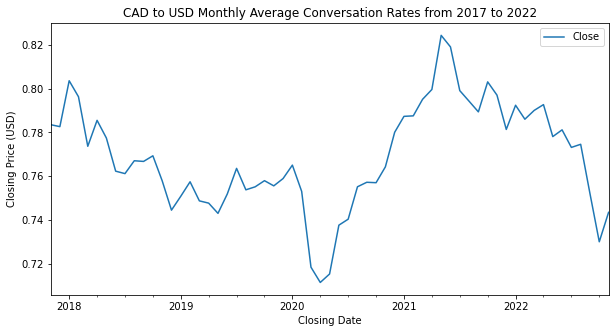

In [188]:
avg_data = data['Close'].resample(rule='M').mean()

avg_data.plot.line(title = 'CAD to USD Monthly Average Conversation Rates from 2017 to 2022', legend = True, figsize=(10,5), ylabel = 'Closing Price (USD)', xlabel ='Closing Date');

Next Step - Forecast 

Now that I have cleaned and analysed the data and checked for properties like seasonality, trends and stationarity, I will use different ML models to forecast the future price & trend